**_<div style="text-align: center"> - - -   Ahmed Gurbuz | SMU Data Science Bootcamp   - - -</div>_**

In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create the connection engine to the sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Use the Inspector to explore the database and print the table names
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Use Inspector to print the column names and types for Measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Use Inspector to print the column names and types for Station table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [8]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
# Total number of dates
session.query(func.count(Measurement.date)).all()

[(19550)]

### Precipitation Analysis

In [10]:
# Retrieving the Latest Date
session.query(Measurement.date, Measurement.prcp).group_by(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23', 0.0)

In [11]:
# Calculate the date 1 year ago from the last data point in the database
one_year_duration = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_duration_q = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_duration).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_duration_df = pd.DataFrame(one_year_duration_q, columns=['date', 'precipitation'])
one_year_duration_df.set_index('date', inplace=True)

<Figure size 1440x720 with 0 Axes>

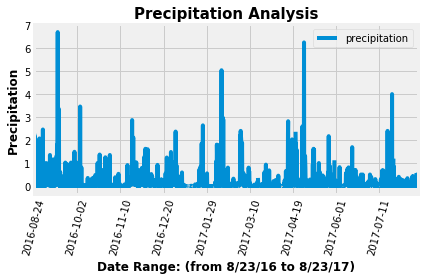

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
fig1 = plt.figure(figsize=(20,10))
one_year_duration_df.plot()
plt.grid(True)
plt.xlabel("Date Range: (from 8/23/16 to 8/23/17)", weight="bold", fontsize=12)
plt.ylabel("Precipitation", weight="bold", fontsize=12)
plt.title("Precipitation Analysis", weight="bold", fontsize=15)
plt.xticks(rotation='75')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
# https://stackoverflow.com/questions/22235245/calculate-summary-statistics-of-columns-in-dataframe 
one_year_duration_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precipitation,2015.0,0.176462,0.460288,0.0,0.0,0.02,0.13,6.7


### Station Analysis

In [14]:
# Design a query to show how many stations are available in this dataset
# Total number of stations 
# https://campus.datacamp.com/courses/introduction-to-relational-databases-in-python/applying-filtering-ordering-and-grouping-to-queries?ex=11
total_number_stations = session.query(func.count(Measurement.station.distinct())).all()
print(f"Total number of stations is {total_number_stations[0][0]} ")

Total number of stations is 9 


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending

sel = [Measurement.station, 
       func.count(Measurement.station)]
print(f"Most active stations are as follows: ")
session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

Most active stations are as follows: 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel2 = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

print(f"Most active station|Lowest Temp.|Highest Temp.|Avg. Temp.")
session.query(*sel2).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

Most active station|Lowest Temp.|Highest Temp.|Avg. Temp.


('USC00519281', 54.0, 85.0, 71.66378066378067)

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
q2 = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > one_year_duration).all()

# Save the query results as a Pandas DataFrame and set the index to the id column
df_2 = pd.DataFrame(q2, columns=['id', 'temperatures'])
df_2.set_index('id', inplace=True)

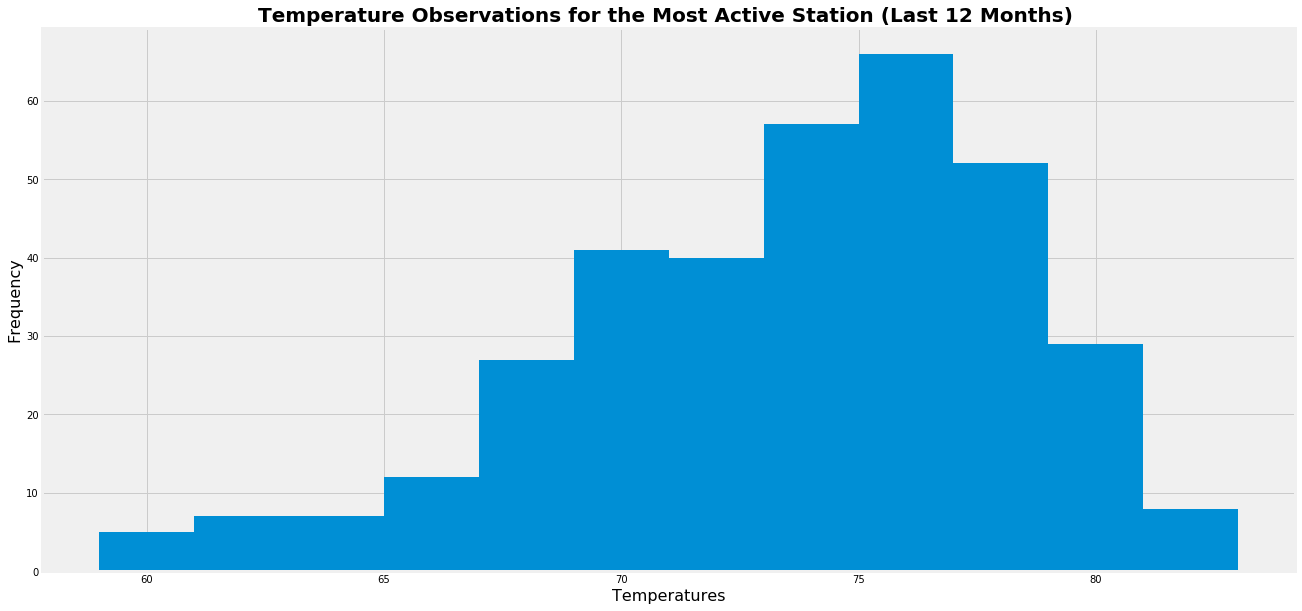

In [18]:
# Design chart size
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Create a histogram
plt.hist(df_2['temperatures'], bins=12)

# Create title and labels for x and y axis 
plt.title("Temperature Observations for the Most Active Station (Last 12 Months) ", weight="bold", fontsize=20)
plt.xlabel("Temperatures", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [21]:
q3 = calc_temps('2012-02-28', '2012-03-05')

df_3 = pd.DataFrame(q3, columns=['tmin', 'tavg', 'tmax']).reset_index()

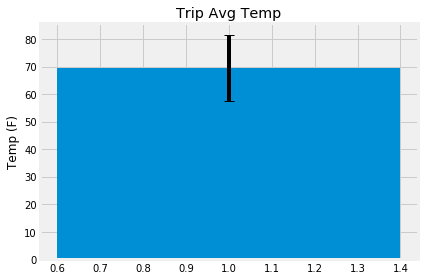

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# https://pythonforundergradengineers.com/python-matplotlib-error-bars.html

y_pos = df_3.tavg
x_pos = 1
error = (df_3['tmax'][0] - df_3['tmin'][0])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos,y_pos, yerr=error, align='center', alpha=1, ecolor='black', capsize=5)
ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel4 = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]

joint2 = session.query(*sel4).filter(Measurement.station == Station.station).filter(Measurement.date > one_year_duration)\
.group_by(Station.name).order_by((func.sum(Measurement.prcp)).desc()).all()

print(joint2)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]


## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip

start_date = '2017-07-10'
end_date = '2017-07-20'

# Use the start and end date to create a range of dates
range_dates = session.query(Measurement.date).filter(Measurement.date > start_date).\
filter(Measurement.date < end_date).group_by(Measurement.date).all()

# Creating a list for the range of dates
dates = []
for x in range_dates:
    dates.append(x[0])

# Strip off the year and save a list of %m-%d strings
years_strip = []
for x in dates:
    years_strip.append(x[5:])

# Loop through the list of %m-%d strings and calculate the normals for each date



In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
